In [1]:
import cv2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

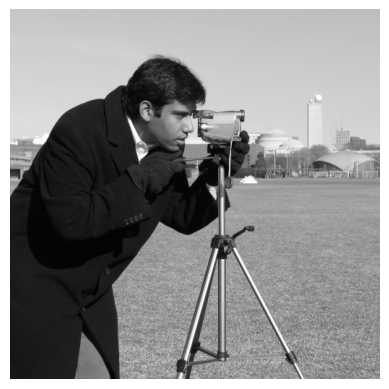

In [2]:
image = cv2.imread("cameraman.png")
image = np.mean(image, axis=2)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

## 1. Effect of Smoothing and Operator Choice on Gradient Estimation  

### 1.1 Baseline (Unsmoothed): Compute the horizontal and vertical derivatives Ix and Iy 
on the unsmoothed image using Finite Difference operator (Filter kernels
Kx = [−1, 0, 1], Ky = [−1, 0, 1]T ).  

In [3]:
kernel_x = np.array([-1, 0, 1])
kernel_y = np.array([-1, 0, 1]).T

In [4]:
def convolution_x(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 1*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (Gray Scale)
    kernel: 1*3 convolution kernel
    '''

    r, c = image.shape
    output = np.zeros((r, c))
    pad_img = np.zeros((r, c+2))
    pad_img[:, 1:c+1] = image
    kernel = np.flip(kernel)
    for row in range(r):
        for col in range(1, c+1):
            patch = pad_img[row, col-1:col+2]
            output[row, col-1] = np.dot(patch, kernel)
    return output

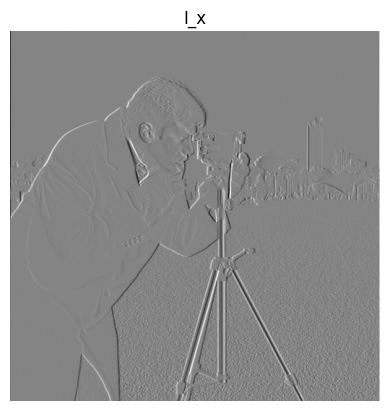

In [5]:
I_x = convolution_x(image, kernel_x)
plt.imshow(I_x, cmap="gray")
plt.title("I_x")
plt.axis("off")
plt.show()

In [6]:
def convolution_y(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*1 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (gray)
    kernel: 3*1 convolution kernel
    '''

    r, c = image.shape
    output = np.zeros((r, c))
    pad_img = np.zeros((r+2, c))
    pad_img[1:r+1, :] = image
    kernel = np.flip(kernel)
    for col in range(c):
        for row in range(1, r+1):
            patch = pad_img[row-1:row+2, col]
            output[row-1, col] = np.dot(patch, kernel)
    return output

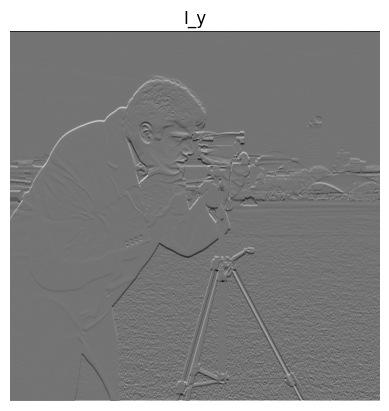

In [7]:
I_y = convolution_y(image, kernel_y)
plt.imshow(I_y, cmap="gray")
plt.title("I_y")
plt.axis("off")
plt.show()

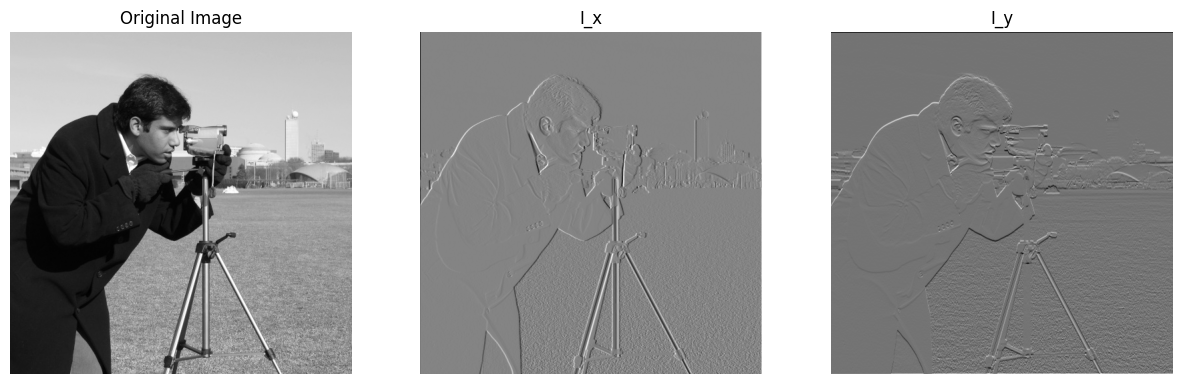

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(I_x, cmap = 'gray')
axes[1].set_title("I_x")
axes[1].axis("off")

axes[2].imshow(I_y, cmap = 'gray')
axes[2].set_title("I_y")
axes[2].axis("off")

plt.show()

### 1.2 Operator Comparison (Unsmoothed): Compute the derivatives on the unsmoothed image using the Sobel operator. 

In [9]:
def sobel_operators(mu=0, sigma=1):
    sobel_operator_x = np.array([[-norm.pdf(1, loc=mu, scale=sigma), 0, norm.pdf(1, loc=mu, scale=sigma)], [-norm.pdf(0, loc=mu, scale=sigma), 0, norm.pdf(0, loc=mu, scale=sigma)], [-norm.pdf(-1, loc=mu, scale=sigma), 0, norm.pdf(-1, loc=mu, scale=sigma)]])
    sobel_operator_y = np.array([[-norm.pdf(1, loc=mu, scale=sigma), -norm.pdf(0, loc=mu, scale=sigma), -norm.pdf(-1, loc=mu, scale=sigma)], [0, 0, 0], [norm.pdf(1, loc=mu, scale=sigma), norm.pdf(0, loc=mu, scale=sigma), norm.pdf(-1, loc=mu, scale=sigma)]])
    return sobel_operator_x, sobel_operator_y

In [10]:
sobel_operator_x, sobel_operator_y = sobel_operators(mu=0, sigma=0.33)

In [11]:
def convolution(image, kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (gray)
    kernel: 3*3 convolution kernel
    '''
    r, c = image.shape
    output = np.zeros((r, c))
    pad_img = np.zeros((r+2, c+2))
    pad_img[1:r+1, 1:c+1] = image
    kernel = np.flipud(np.fliplr(kernel))
    for row in range(1, r+1):
        for col in range(1, c+1):
            patch = pad_img[row-1:row+2, col-1:col+2]
            output[row-1, col-1] = np.dot(patch.flatten(), kernel.flatten())
    return output

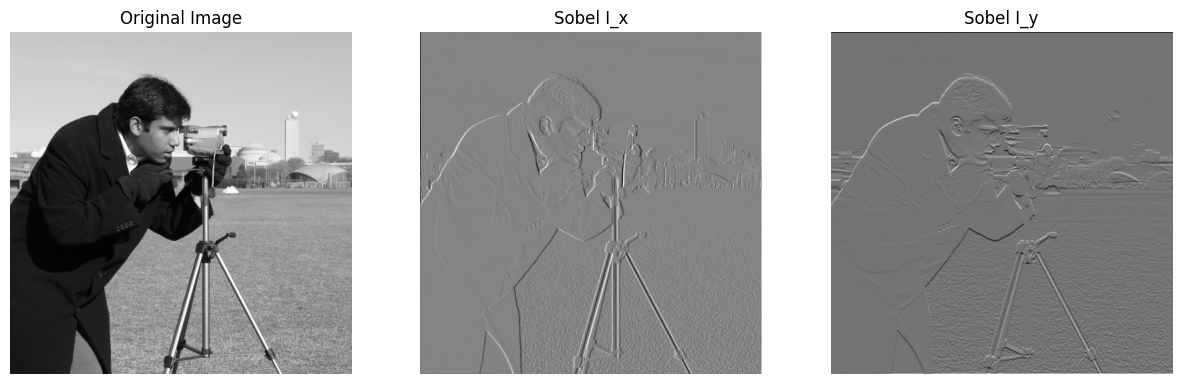

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

sobel_I_x = convolution(image, sobel_operator_x)
axes[1].imshow(sobel_I_x, cmap = 'gray')
axes[1].set_title("Sobel I_x")
axes[1].axis("off")

sobel_I_y = convolution(image, sobel_operator_y)
axes[2].imshow(sobel_I_y, cmap = 'gray')
axes[2].set_title("Sobel I_y")
axes[2].axis("off")

plt.show()

### 1.3 For both cases, calculate the gradient magnitude M = root(Ix^2 + Iy^2) and direction
θ = arctan2(Iy, Ix) (Use np.arctan2()).

In [13]:
def gradient_magnitude(I_x, I_y):
    return np.sqrt(I_x**2 + I_y**2)

def gradient_direction(I_x, I_y):
    return np.arctan2(I_y, I_x)

In [14]:
gradient_magnitude_finite_diff = gradient_magnitude(I_x, I_y)
gradient_direction_finite_diff = gradient_direction(I_x, I_y)

gradient_magnitude_sobel = gradient_magnitude(sobel_I_x, sobel_I_y)
gradient_direction_sobel = gradient_direction(sobel_I_x, sobel_I_y)

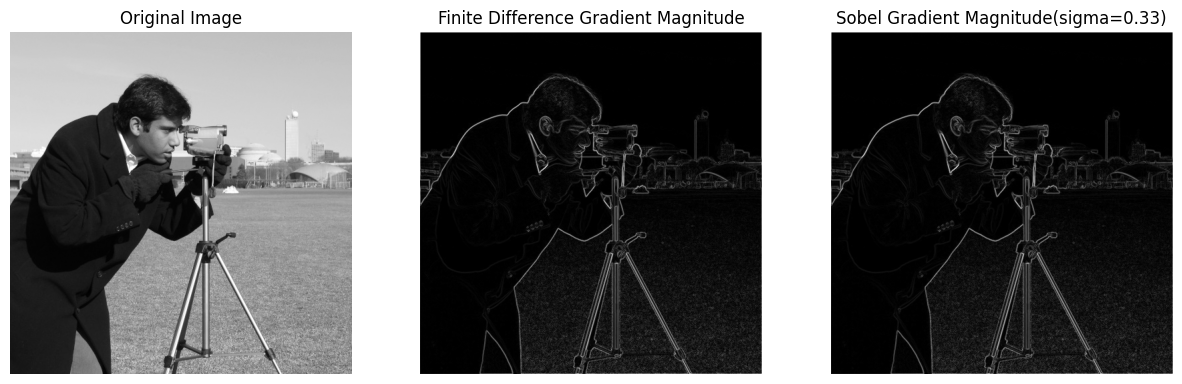

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gradient_magnitude_finite_diff, cmap = 'gray')
axes[1].set_title("Finite Difference Gradient Magnitude")
axes[1].axis("off")

axes[2].imshow(gradient_magnitude_sobel, cmap = 'gray')
axes[2].set_title("Sobel Gradient Magnitude(sigma=0.33)")
axes[2].axis("off")

plt.show()

### 1.4 Apply an explicit Gaussian smoothing filter (σ = 0.33, kernel size = 3) to the unsmoothed image and recompute the gradients using Finite Difference operator

In [ ]:
def smoothing_operator(mu=0, sigma=1):
    smoothing_kernel = (1/((norm.pdf(-1, loc=mu, scale=sigma) + norm.pdf(0, loc=mu, scale=sigma) + norm.pdf(1, loc=mu, scale=sigma))**2)) * np.array([[norm.pdf(-1, loc=mu, scale=sigma)*norm.pdf(-1, loc=mu, scale=sigma), norm.pdf(0, loc=mu, scale=sigma)*norm.pdf(-1, loc=mu, scale=sigma), norm.pdf(1, loc=mu, scale=sigma)*norm.pdf(-1, loc=mu, scale=sigma)],
                                                                                                                                                      [norm.pdf(-1, loc=mu, scale=sigma)*norm.pdf(0, loc=mu, scale=sigma), norm.pdf(0, loc=mu, scale=sigma)*norm.pdf(0, loc=mu, scale=sigma), norm.pdf(1, loc=mu, scale=sigma)*norm.pdf(0, loc=mu, scale=sigma)],
                                                                                                                                                      [norm.pdf(-1, loc=mu, scale=sigma)*norm.pdf(1, loc=mu, scale=sigma), norm.pdf(0, loc=mu, scale=sigma)*norm.pdf(1, loc=mu, scale=sigma), norm.pdf(1, loc=mu, scale=sigma)*norm.pdf(1, loc=mu, scale=sigma)]])
    return smoothing_kernel

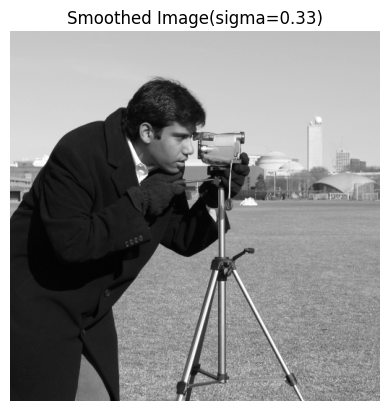

In [ ]:
smoothing_kernel = smoothing_operator(sigma=0.33)
smoothed_img = convolution(image, smoothing_kernel)
plt.imshow(smoothed_img, cmap= 'gray')
plt.title("Smoothed Image(sigma=0.33)")
plt.axis("off")
plt.show()

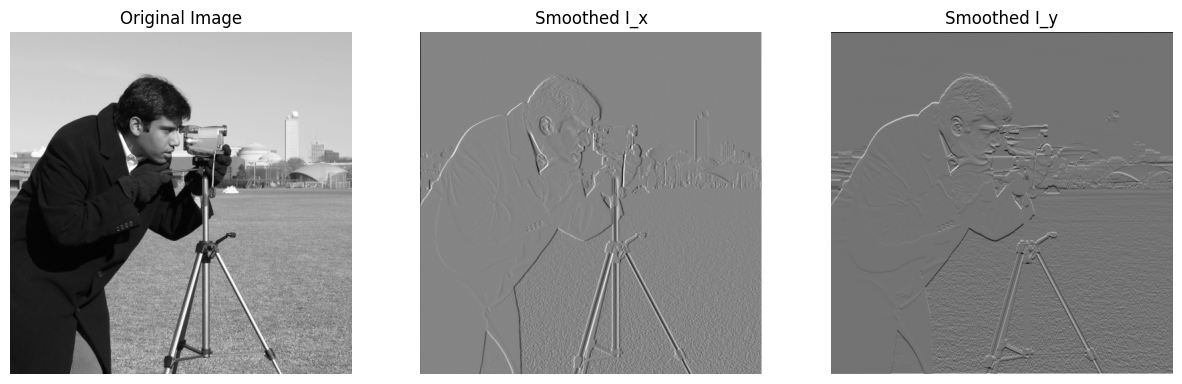

In [18]:
smoothed_img_I_x = convolution_x(smoothed_img, kernel_x)
smoothed_img_I_y = convolution_y(smoothed_img, kernel_y)

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(smoothed_img_I_x, cmap = 'gray')
axes[1].set_title("Smoothed I_x")
axes[1].axis("off")

axes[2].imshow(smoothed_img_I_y, cmap = 'gray')
axes[2].set_title("Smoothed I_y")
axes[2].axis("off")

plt.show()

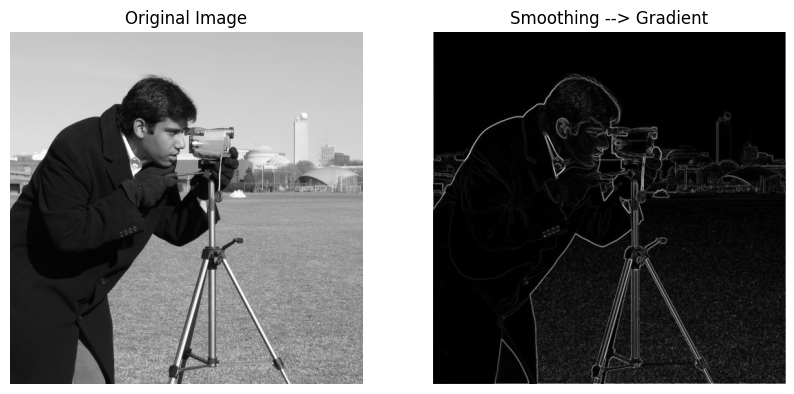

In [19]:
gradient_magnitude_smoothed_img = gradient_magnitude(smoothed_img_I_x, smoothed_img_I_y)
gradient_direction_smoothed_img = gradient_direction(smoothed_img_I_x, smoothed_img_I_y)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(gradient_magnitude_smoothed_img, cmap = 'gray')
axes[1].set_title("Smoothing --> Gradient")
axes[1].axis("off")

plt.show()

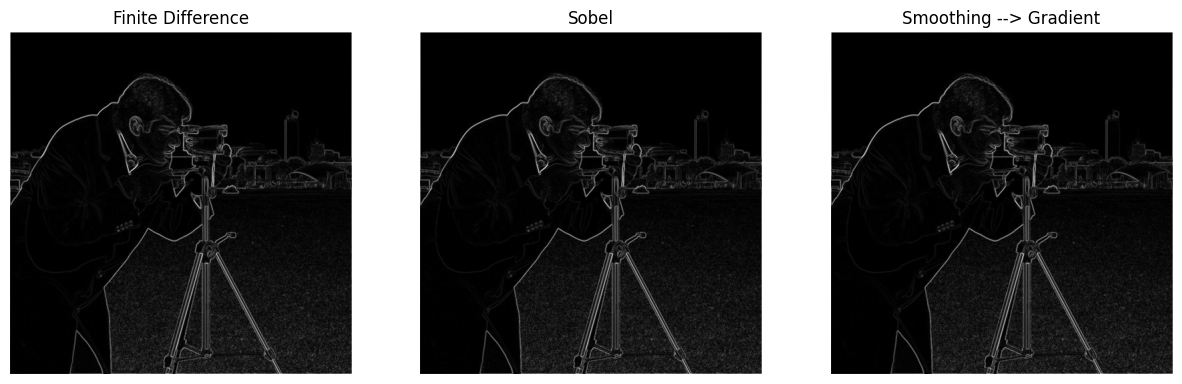

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(gradient_magnitude_finite_diff, cmap = 'gray')
axes[0].set_title("Finite Difference")
axes[0].axis("off")

axes[1].imshow(gradient_magnitude_sobel, cmap = 'gray')
axes[1].set_title("Sobel")
axes[1].axis("off")

axes[2].imshow(gradient_magnitude_smoothed_img, cmap = 'gray')
axes[2].set_title("Smoothing --> Gradient")
axes[2].axis("off")

plt.show()

### 1.5 Compare the gradient magnitudes obtained from the direct Sobel operator against the two-step Gaussian Smoothing (σ = 0.5, k = 3) + Finite Difference pipeline

#### Sobel

In [21]:
sobel_operator_x_1, sobel_operator_y_1 = sobel_operators(mu=0, sigma=0.5)

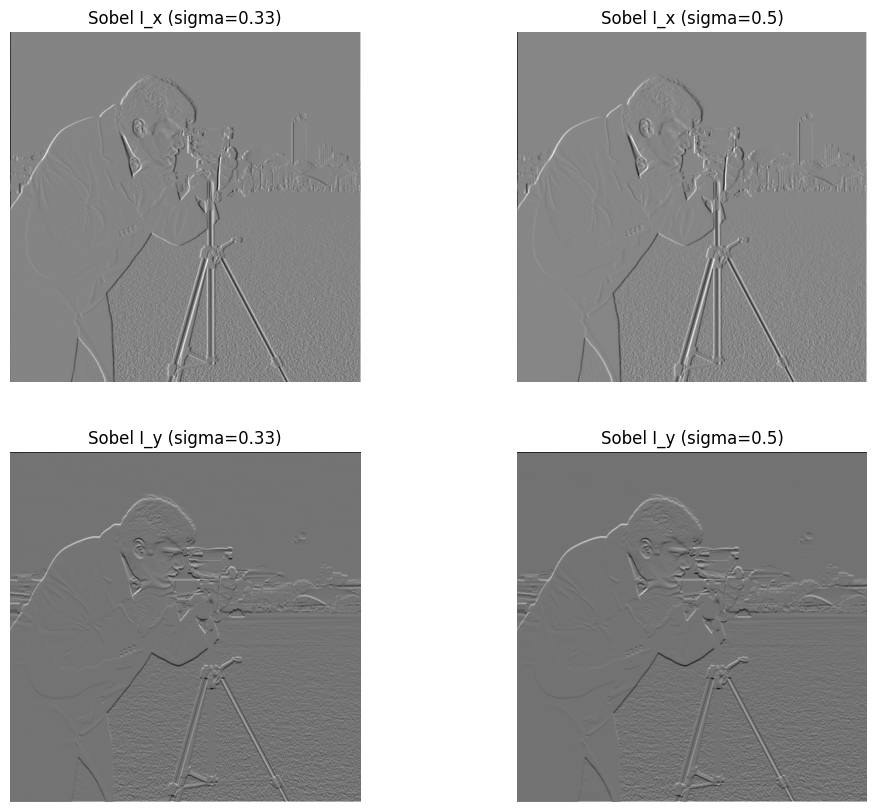

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

axes[0,0].imshow(sobel_I_x, cmap = 'gray')
axes[0,0].set_title("Sobel I_x (sigma=0.33)")
axes[0,0].axis("off")

axes[1,0].imshow(sobel_I_y, cmap = 'gray')
axes[1,0].set_title("Sobel I_y (sigma=0.33)")
axes[1,0].axis("off")

sobel_I_x_1 = convolution(image, sobel_operator_x_1)
axes[0,1].imshow(sobel_I_x_1, cmap = 'gray')
axes[0,1].set_title("Sobel I_x (sigma=0.5)")
axes[0,1].axis("off")

sobel_I_y_1 = convolution(image, sobel_operator_y_1)
axes[1,1].imshow(sobel_I_y_1, cmap = 'gray')
axes[1,1].set_title("Sobel I_y (sigma=0.5)")
axes[1,1].axis("off")

plt.show()

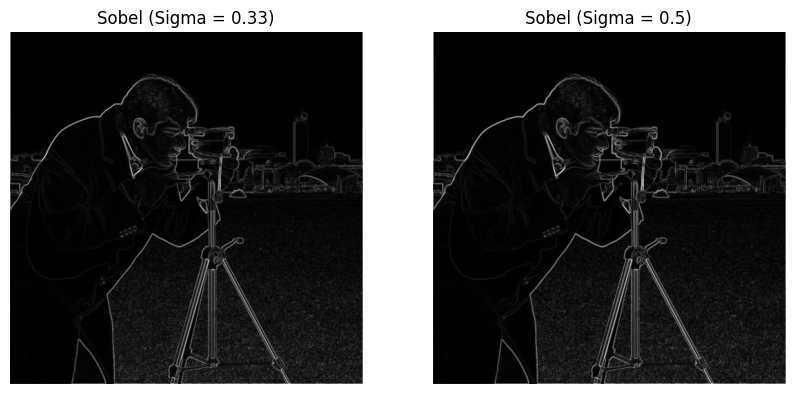

In [34]:
gradient_magnitude_sobel_1 = gradient_magnitude(sobel_I_x_1, sobel_I_y_1)
gradient_direction_sobel_1 = gradient_direction(sobel_I_x_1, sobel_I_y_1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(gradient_magnitude_sobel, cmap = 'gray')
axes[0].set_title("Sobel (Sigma = 0.33)")
axes[0].axis("off")

axes[1].imshow(gradient_magnitude_sobel_1, cmap = 'gray')
axes[1].set_title("Sobel (Sigma = 0.5)")
axes[1].axis("off")

plt.show()

#### 2 Step Pipeline

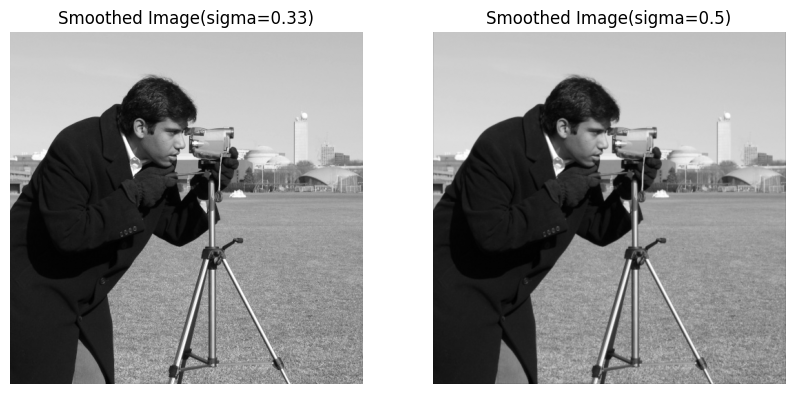

In [24]:
smoothing_kernel_1 = smoothing_operator(sigma=0.5)
smoothed_img_1 = convolution(image, smoothing_kernel_1)


fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(smoothed_img, cmap = 'gray')
axes[0].set_title("Smoothed Image(sigma=0.33)")
axes[0].axis("off")

axes[1].imshow(smoothed_img_1, cmap = 'gray')
axes[1].set_title("Smoothed Image(sigma=0.5)")
axes[1].axis("off")

plt.show()

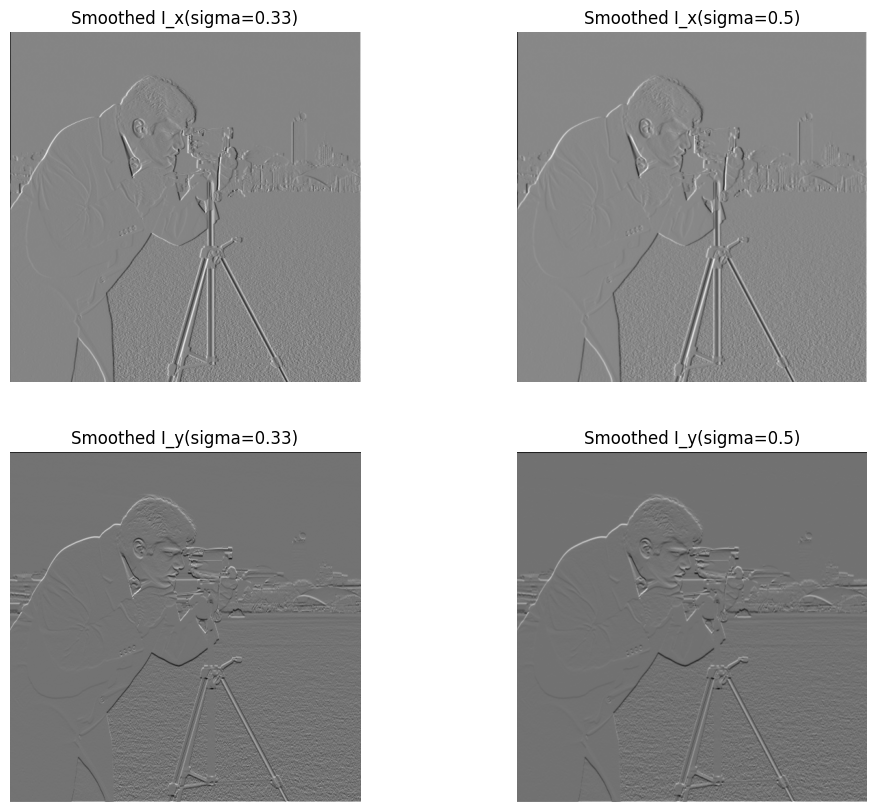

In [28]:
smoothed_img_I_x_1 = convolution_x(smoothed_img_1, kernel_x)
smoothed_img_I_y_1 = convolution_y(smoothed_img_1, kernel_y)

fig, axes = plt.subplots(2, 2, figsize=(12,10))

axes[0,0].imshow(smoothed_img_I_x, cmap = 'gray')
axes[0,0].set_title("Smoothed I_x(sigma=0.33)")
axes[0,0].axis("off")

axes[0,1].imshow(smoothed_img_I_x_1, cmap = 'gray')
axes[0,1].set_title("Smoothed I_x(sigma=0.5)")
axes[0,1].axis("off")

axes[1,0].imshow(smoothed_img_I_y, cmap = 'gray')
axes[1,0].set_title("Smoothed I_y(sigma=0.33)")
axes[1,0].axis("off")

axes[1,1].imshow(smoothed_img_I_y_1, cmap = 'gray')
axes[1,1].set_title("Smoothed I_y(sigma=0.5)")
axes[1,1].axis("off")

plt.show()

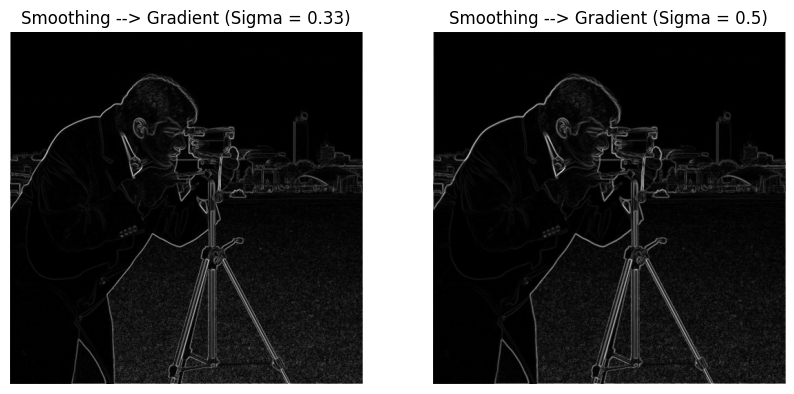

In [33]:
gradient_magnitude_smoothed_img_1 = gradient_magnitude(smoothed_img_I_x_1, smoothed_img_I_y_1)
gradient_direction_smoothed_img_1 = gradient_direction(smoothed_img_I_x_1, smoothed_img_I_y_1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(gradient_magnitude_smoothed_img, cmap = 'gray')
axes[0].set_title("Smoothing --> Gradient (Sigma = 0.33)")
axes[0].axis("off")

axes[1].imshow(gradient_magnitude_smoothed_img_1, cmap = 'gray')
axes[1].set_title("Smoothing --> Gradient (Sigma = 0.5)")
axes[1].axis("off")

plt.show()

#### Comparison

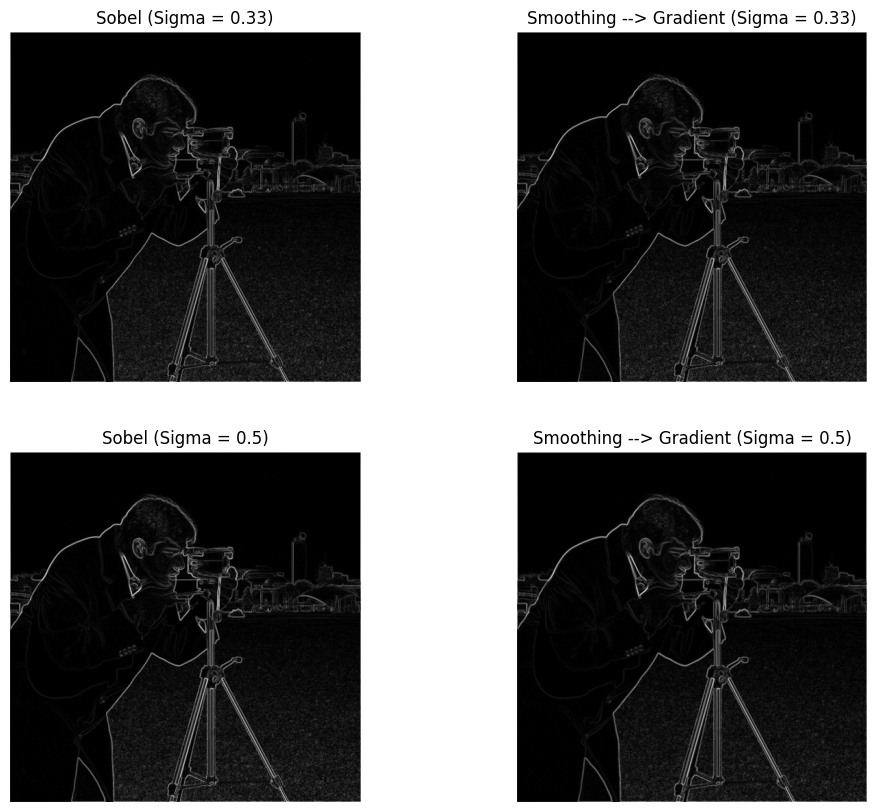

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

axes[0,0].imshow(gradient_magnitude_sobel, cmap = 'gray')
axes[0,0].set_title("Sobel (Sigma = 0.33)")
axes[0,0].axis("off")

axes[0,1].imshow(gradient_magnitude_smoothed_img, cmap = 'gray')
axes[0,1].set_title("Smoothing --> Gradient (Sigma = 0.33)")
axes[0,1].axis("off")

axes[1,0].imshow(gradient_magnitude_sobel_1, cmap = 'gray')
axes[1,0].set_title("Sobel (Sigma = 0.5)")
axes[1,0].axis("off")

axes[1,1].imshow(gradient_magnitude_smoothed_img_1, cmap = 'gray')
axes[1,1].set_title("Smoothing --> Gradient (Sigma = 0.5)")
axes[1,1].axis("off")

plt.show()

### 1.6 Between these two methods, which is more computationally efficient and why?

- The Sobel Operator is computationally more effecient.
- This is because the Gradient of Gaussian is pre-computed and is used for every pixel of the image. And it is always a constant. Therefore, we can get away with only one convolution. Therefore, 1 convolution for Ix and 1 for Iy. A total of 2 convolutions is required
- In the two step pipeline, the Gaussian smoothing is applied to the image. This is done by convolving the image with a Gaussian kernel. Then the finite difference is applied to the image. This is done by convolving the image with a finite difference kernel. Therefore, we need 2 convolutions. Therefore, 2 convolutions for Ix and 2 for Iy. A total of 4 convolutions is required
- This way, Sobel Operator is computationally more effecient.

## 2. Directional Quantization (180◦)
Using the gradient angle calculations from Sobel
filter, categorize gradient orientations into eight sectors spanning a 180◦ range. In this
model, opposing directions (e.g., 0◦ and 180◦) are considered equivalent.  
• Map the gradient from the raw range of (−π, π) (as outputted by np.arctan2())
to a positive range of [0, 180◦).  
• Quantize the 180◦ span into 8 equal sectors, each of width 22.5◦.  
Repeat the same for four sectors (each spanning 45◦) as well and elaborate on the results.  
Submission Requirement: Plot two color-coded visualizations representing the gradient
orientations quantized into 4 and 8 sectors respectively. To accurately represent
the angular continuity, where 179◦ and 0◦ are neighbors, utilize a cyclic colormap (such
as hsv or twilight) to ensure the ”wrap-around” is visually seamless.